In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

# 1 Consumir Dados da url

In [2]:
#Parametros
#qtd 'n' de linhas (registros)

In [3]:
qtd =500
url = "https://randomuser.me/api/?results={}".format(qtd)

In [4]:
#coletar dados da API

In [5]:
dft = requests.get(url)

In [6]:
x = dft.json()

In [7]:
df = pd.DataFrame(x['results'])

In [8]:
data = json.dumps(x)

# 2 Armazenar dados em CSV

In [139]:
#desmembrando subsets name, location, login, dob, registred, id, picture

In [9]:
dfname =pd.json_normalize(df['name'])
dfloc =pd.json_normalize(df['location'])
dflogin =pd.json_normalize(df['login'])
dfdob =pd.json_normalize(df['dob'])

In [10]:
dfreg =pd.json_normalize(df['registered'])
dfid =pd.json_normalize(df['id'])
dfpict =pd.json_normalize(df['picture'])

In [11]:
dfcsv=pd.concat([df['gender'],dfname,dfloc,df['email'],dflogin,dfdob,df['phone'],df['cell'],dfreg,dfid,dfpict,df['nat']],axis=1)

In [12]:
dfcsv.head(5)

,gender,title,first,last,city,state,country,postcode,street.number,street.name,...,phone,cell,date,age,name,value,large,medium,thumbnail,nat
0,female,Miss,Elia,Robin,Fort-de-France,Lozère,France,23530,5261,Avenue du Château,...,03-41-58-00-11,06-92-45-30-47,2019-02-12T21:13:48.439Z,4,INSEE,2900171729966 47,https://randomuser.me/api/portraits/women/71.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,FR
1,female,Miss,Charlie,Harcourt,Westport,Québec,Canada,V5P 4X6,5333,Wellington St,...,X82 A89-3384,G27 J36-6764,2020-11-23T00:34:58.066Z,2,SIN,564193050,https://randomuser.me/api/portraits/women/14.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,CA
2,female,Mrs,Buse,Bakırcıoğlu,Osmaniye,Tokat,Turkey,94651,5401,Talak Göktepe Cd,...,(016)-815-4079,(575)-221-2136,2018-11-04T02:27:15.233Z,4,,None,https://randomuser.me/api/portraits/women/56.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,TR
3,female,Mrs,Ariana,Roberts,Blenheim,Tasman,New Zealand,34873,4140,Clark Avenue,...,(006)-995-5188,(946)-218-7677,2021-09-23T10:41:29.410Z,1,,None,https://randomuser.me/api/portraits/women/69.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NZ
4,male,Mr,Balendra,Moolya,Rajahmundry,Sikkim,India,80501,501,Santhekatte,...,8569537452,9632189387,2013-02-24T06:00:56.748Z,10,UIDAI,177788804687,https://randomuser.me/api/portraits/men/13.jpg,https://randomuser.me/api/portraits/med/men/13...,https://randomuser.me/api/portraits/thumb/men/...,IN


In [151]:
dfcsv.to_csv('randomuser.csv', sep=',', encoding='utf-8')

# 3 Formato de telefone e celular, transformá-los para um formato único, escolhido arbitrariamente

In [13]:
#retirando de phone caracteres 'espaço' ( - )
p = df['phone'].replace('\(','',regex=True)
p = p.replace(' ','',regex=True)
p = p.replace('\)','',regex=True)
p = p.replace('-','',regex=True)
# substituindo phone com novo formato
df['phone'] = '(' + p.str[:3] + ')' + p.str[3:6] + '-' + p.str[6:11]

In [14]:
 '(' + p.str[:3] + ')' + p.str[3:6] + '-' + p.str[6:11]

0      (034)158-0011
1      (X82)A89-3384
2      (016)815-4079
3      (006)995-5188
4      (856)953-7452
           ...      
495      (337)560-71
496    (076)224-7742
497    (030)559-6151
498    (757)634-3751
499    (038)718-3023
Name: phone, Length: 500, dtype: object

# 4 Agrupamento, porcentagem de usuários por país e gênero

<Axes: ylabel='city'>

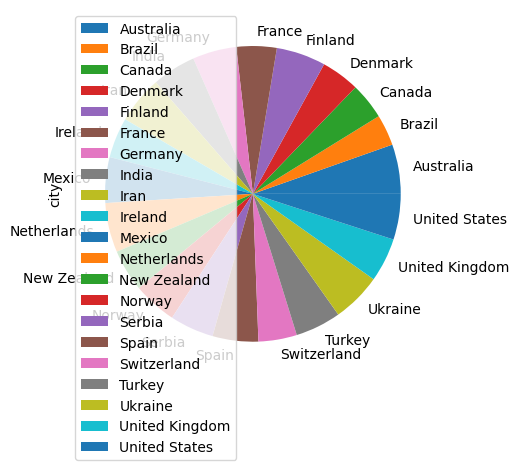

In [15]:
dfloc.groupby(['country']).count().plot(y='city',kind='pie')

In [160]:
#Agrupamento por gênero

In [174]:
#ordenar e contar por gênero
dfsex=df.sort_values(['gender'])
sex=dfsex.groupby(df['gender']).agg({'name':'count'})

In [175]:
sex.apply(lambda x:100 * x / float(x.sum()))

,name
gender,
female,49.8
male,50.2


<AxesSubplot:ylabel='name'>

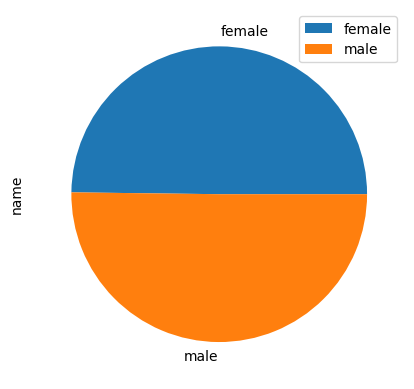

In [177]:
dfsex.groupby(['gender']).count().plot(y='name',kind='pie')

In [71]:
city.apply(lambda x:100 * x / float(x.sum()))

,name
nat,
AU,4.6
BR,3.2
CA,6.4
CH,5.0
DE,4.6
DK,4.6
ES,5.2
FI,2.8
FR,4.6


# 5 Analisando dados com agrupamento 

In [16]:
ctr=dfloc.groupby(['country','state']).count()

In [17]:
ctr.apply(lambda x:100 * x / float(x.sum()))

city  postcode  street.number  \
country       state                                                         
Australia     Australian Capital Territory   1.0       1.0            1.0   
              New South Wales                0.6       0.6            0.6   
              Northern Territory             0.4       0.4            0.4   
              Queensland                     0.4       0.4            0.4   
              South Australia                0.4       0.4            0.4   
...                                          ...       ...            ...   
United States South Carolina                 0.2       0.2            0.2   
              Tennessee                      0.4       0.4            0.4   
              Utah                           0.2       0.2            0.2   
              Vermont                        0.2       0.2            0.2   
              Wisconsin                      0.2       0.2            0.2   

                                            street.name  coordinates.latitude  \
country       state                                                             
Australia     Australian Capital Territory          1.0                   1.0   
              New South Wales                       0.6                   0.6   
              Northern Territory                    0.4                   0.4   
              Queensland                            0.4                   0.4   
              South Australia                       0.4                   0.4   
...                                                 ...                   ...   
United States South Carolina                        0.2                   0.2   
              Tennessee                             0.4                   0.4   
              Utah                                  0.2                   0.2   
              Vermont                               0.2                   0.2   
              Wisconsin                             0.2                   0.2   

                                            coordinates.longitude  \
country       state                                                 
Australia     Australian Capital Territory                    1.0   
              New South Wales                                 0.6   
              Northern Territory                              0.4   
              Queensland                                      0.4   
              South Australia                                 0.4   
...                                                           ...   
United States South Carolina                                  0.2   
              Tennessee                                       0.4   
              Utah                                            0.2   
              Vermont                                         0.2   
              Wisconsin                                       0.2   

                                            timezone.offset  \
country       state                                           
Australia     Australian Capital Territory              1.0   
              New South Wales                           0.6   
              Northern Territory                        0.4   
              Queensland                                0.4   
              South Australia                           0.4   
...                                                     ...   
United States South Carolina                            0.2   
              Tennessee                                 0.4   
              Utah                                      0.2   
              Vermont                                   0.2   
              Wisconsin                                 0.2   

                                            timezone.description  
country       state                                               
Australia     Australian Capital Territory                   1.0  
              New South Wales                                0.6  
  

# Total do Brasil e demais

In [20]:
dfbr = dfloc.query("country=='Brazil'")
#dfbr = dfloc.filter(like='Brazil',axis=0)

In [21]:
dfbr.groupby(['country','state']).sum()

C:\Users\master\AppData\Local\Temp\ipykernel_7064\1905058105.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfbr.groupby(['country','state']).sum()


street.number
country state                             
Brazil  Amapá                         5092
        Amazonas                      3543
        Bahia                          801
        Ceará                         7518
        Espírito Santo                 907
        Minas Gerais                  6026
        Paraná                        3556
        Paraíba                       8801
        Pernambuco                    8858
        Rio Grande do Norte          14849
        Roraima                       4674
        Sergipe                        348

In [22]:
dfloc.groupby(['country']).sum()

C:\Users\master\AppData\Local\Temp\ipykernel_7064\3374250746.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfloc.groupby(['country']).sum()


,street.number
country,
Australia,159719
Brazil,64973
Canada,93240
Denmark,88910
Finland,154624
France,131785
Germany,118181
India,104920
Iran,139647


# 6 (opcional): Particionando dados

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [3]:
import os, pathlib
curpath = os.path.dirname(os.path.abspath("__file__")) 

In [8]:
def salvacsv (dfdados = pd.DataFrame({'ano':[2021, 2020,2020],  'mes':[1,2,3], 'uf':['SP','SP','RJ'], 'dado':['a','b','c']})):

#def particao(dir=curpath):
#    os.dir(curpath)
#    if not os.path.exists(dir):
#       os.makedirs(dir)
#    os.chdir(dir)
        
    for ind in dfdados.index:
        os.chdir(curpath)
        dfind=[[ dfdados['ano'][ind],  dfdados['mes'][ind],  dfdados['uf'][ind],  dfdados['dado'][ind]]]
        dfcsv = pd.DataFrame (dfind, columns = ['ano', 'mes', 'uf', 'dado']) 
        dire = curpath+'\\'+str(dfdados['ano'][ind])
        if not os.path.exists(dire):
            os.makedirs(dire)
        os.chdir(dire)
        if os.path.isfile(dire+'\hive.csv'):
            dfcsv.to_csv('hive.csv', mode='a', index=False, header=False, sep=',', encoding='utf-8')
    #        print('append')
        else:
            dfcsv.to_csv('hive.csv', sep=',', encoding='utf-8')
      


# 7 Parametrizando seu código

In [23]:
def impdadosapi(url = "https://randomuser.me/api/?results={}", qtd = 500):
    url = url.format(qtd)
    dft = requests.get(url)
    x = dft.json()
    df = pd.DataFrame(x['results'])


In [24]:
def gravacsv(nmtxt = "randomuser.csv"):
    dfname =pd.json_normalize(df['name'])
    dfloc =pd.json_normalize(df['location'])
    dflogin =pd.json_normalize(df['login'])
    dfdob =pd.json_normalize(df['dob'])
    dfreg =pd.json_normalize(df['registered'])
    dfid =pd.json_normalize(df['id'])
    dfpict =pd.json_normalize(df['picture'])
    dfcsv=pd.concat([df['gender'],dfname,dfloc,df['email'],dflogin,dfdob,df['phone'],df['cell'],dfreg,dfid,dfpict,df['nat']],axis=1)
    dfcsv.to_csv(nmtxt, sep=',', encoding='utf-8')